In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [73]:
data=pd.read_csv('train.csv')
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [74]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [75]:
data = data.drop('Id',axis=1)

In [76]:
data.dropna(thresh=len(data) * 0.7, axis=1, inplace=True)


In [77]:
X=data.drop('SalePrice',axis=1)
y=data['SalePrice']

In [78]:
X = X.fillna(X.median(numeric_only=True))


In [79]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = ['Neighborhood', 'HouseStyle']  

X_cat = X[cat_cols].fillna("Missing")
X_encoded = pd.get_dummies(X_cat, drop_first=True)

X_final = pd.concat([X[numeric_cols], X_encoded], axis=1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


In [81]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
lr_pred=lr_model.predict(X_test)



In [82]:
rg_model=Ridge()
rg_model.fit(X_train,y_train)
rg_pred=rg_model.predict(X_test)

In [83]:
print("Linear Regression R²:", r2_score(y_test, lr_pred))
print("Linear Regression MSE:", mean_squared_error(y_test, lr_pred))
print("Ridge Regression R²:", r2_score(y_test, rg_pred))
print("Ridge Regression MSE:", mean_squared_error(y_test, rg_pred))

Linear Regression R²: 0.8533406458974836
Linear Regression MSE: 1124925087.3016684
Ridge Regression R²: 0.8534859745570087
Ridge Regression MSE: 1123810369.0758574


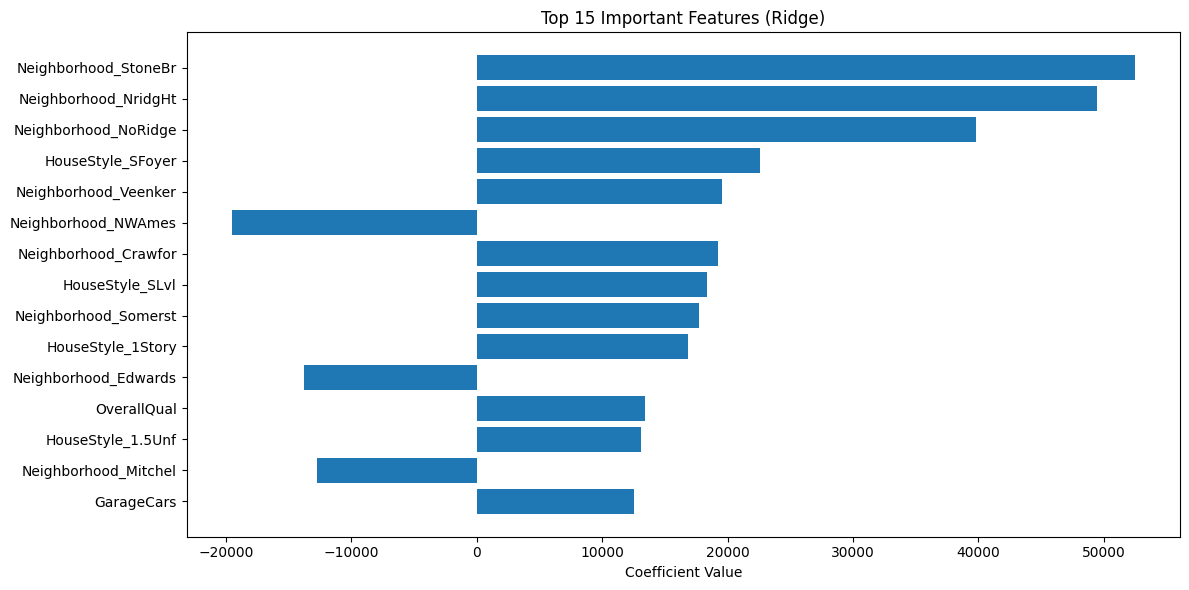

In [84]:
coef = rg_model.coef_
features = X_final.columns
top_features = np.argsort(np.abs(coef))[-15:]

plt.figure(figsize=(12, 6))
plt.barh(range(15), coef[top_features])
plt.yticks(range(15), features[top_features])
plt.title("Top 15 Important Features (Ridge)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()


In [85]:

pd.DataFrame({
    "Actual": y_test,
    "Linear_Predicted": lr_pred,
    "Ridge_Predicted": rg_pred
}).to_csv("house_price_predictions.csv", index=False)